<a href="https://colab.research.google.com/github/Lexx4nder/challenge2-data-science-LATAM/blob/main/Challenge_Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
#Carga de base de datos depurada
df = pd.read_csv('/content/Base de datos depurada.csv')
#Data Frame: resumen estadístico y separación por lista
print(df.sample(10))
print(df.shape)
print(df.columns.tolist())
print(df.info)
print(df.describe())

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
3683  5195-KPUNQ    No  Female              1      No         No      53   
1291  1925-GMVBW    No  Female              0      No         No       5   
495   0725-CXOTM    No  Female              0      No         No      36   
6885  9778-OGKQZ    No    Male              0     Yes         No      72   
3338  4753-PADAS    No  Female              0     Yes         No      67   
1351  2011-TRQYE   Yes    Male              0      No         No      18   
6249  8844-TONUD   Yes    Male              0     Yes        Yes      13   
6193  8757-TFHHJ    No    Male              0      No         No       1   
4039  5696-EXCYS    No    Male              0      No         No      17   
1341  1998-VHJHK    No  Female              0      No         No      27   

     PhoneService     MultipleLines InternetService  ...     DeviceProtection  \
3683          Yes                No     Fiber optic  ...                   No   
1

In [4]:
df.columns #Numero de columnas dentro del dataframe

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [10]:
#Mostrar conteo de valores únicos para cada columna
categorical_cols=df.select_dtypes(include='object').columns

for col in categorical_cols:
  print(f'\nValores únicos en "{col}":')
  print(df[col].value_counts())


Valores únicos en "customerID":
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64

Valores únicos en "Churn":
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Valores únicos en "gender":
gender
Male      3555
Female    3488
Name: count, dtype: int64

Valores únicos en "Partner":
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Valores únicos en "Dependents":
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Valores únicos en "PhoneService":
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Valores únicos en "MultipleLines":
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Valores únicos en "InternetService":
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype:

*Depuración de columnas:*

**Eliminamos las columnas sin valor predictivo para el análisis**

Para evitar confusión y una mala predicción al perjudicar el resultado de los modelos.

In [11]:
#Eliminamos columnas sin aportación significativa al análisis
datos = df.drop(['customerID'],axis=1)

print(datos.sample(5))

     Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4605    No  Female              0      No         No       8          Yes   
3994    No  Female              0      No        Yes       3          Yes   
570     No  Female              0      No         No      30          Yes   
2861    No    Male              0      No         No      72           No   
6564   Yes  Female              0      No         No      13          Yes   

         MultipleLines InternetService       OnlineSecurity  ...  \
4605                No     Fiber optic                   No  ...   
3994                No             DSL                  Yes  ...   
570                 No              No  No internet service  ...   
2861  No phone service             DSL                  Yes  ...   
6564               Yes     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
4605                   No                   No           

*Transformación de variables categóricas/numéricos a formato int/float usando codificación Machine Learning*

In [13]:
#Codificamos la variable 'gender' como binaria
datos['gender'] = datos['gender'].map({'Female':0, 'Male':1})
#definimos las columnas categóricas que requieren codificación
columnas_categ = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]
#Aplicamos One-Hot Encoding (eliminando la primera categoría para evitar multicolinealidad)
datos_encoded = pd.get_dummies(datos, columns=columnas_categ, drop_first=True)
#Codificamos la variable objetivo 'Churn'
datos_encoded['Churn'] = datos_encoded['Churn'].map({'No':0, 'Yes':1})
datos_encoded['Churn'].map({'No':0, 'Yes':1})
#Vista del nuevo Dataframe codificado:
print(datos_encoded.sample(5))


      Churn  gender  SeniorCitizen  tenure  Charges.Monthly  Charges.Total  \
6111      1       0              1      60           106.00        6441.40   
6729      0       0              0      38            54.50        2076.05   
3913      0       0              0      17            20.15         353.65   
6007      0       1              0      62           115.55        7159.05   
1572      0       1              0      49            99.25        4920.80   

      Cuentas_Diarias  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
6111         3.533333        False           False              True  ...   
6729         1.816667         True            True              True  ...   
3913         0.671667        False           False              True  ...   
6007         3.851667         True            True              True  ...   
1572         3.308333         True           False              True  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
6111      

In [14]:
datos_encoded.shape

(7043, 32)

*Proporción de la cancelación*

In [15]:
#Conteo de clientes que cancelaron v.s. Los que no abandonaron la empresa
conteo_cancelaciones = datos['Churn'].value_counts()
print("Conteo de clientes que cancelaron:")
print(conteo_cancelaciones)

Conteo de clientes que cancelaron:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [16]:
#Proporción en porcentajes
proporcion_cancelaciones = datos['Churn'].value_counts(normalize=True) * 100
print("\nProporción de clientes que cancelaron (%):")
print(proporcion_cancelaciones.round(2))


Proporción de clientes que cancelaron (%):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


In [17]:
#Resumen claro para presentación:
print(f"\n✅ Clientes que cancelaron: {proporcion_cancelaciones.get('Yes', 0):.2f}%")
print(f"❌ Clientes que permanecieron: {proporcion_cancelaciones.get('No', 0):.2f}%")


✅ Clientes que cancelaron: 26.54%
❌ Clientes que permanecieron: 73.46%


**Undersampling- Oversampling**


*SMOTE:Para situaciones de desbalanceo notorio.*

In [18]:
#⚖️ Balanceo de Clases con SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

#Separar variables predictorias (X) y variable objetivo (Y)
X = datos_encoded.drop('Churn', axis=1)
y = datos_encoded['Churn']

#Mostrar distribución original de clases:
print("Distribución original de clases:")
print(Counter(y))

# Aplicar SMOTE
smote = SMOTE(random_state=42)

#Balancear clases con SMOTE
X_sampled, y_sampled = smote.fit_resample(X, y)

#Mostrar distribución de clases después del balanceo:
print("\nDistribución de clases después del balanceo:")
print(Counter(y_sampled))


Distribución original de clases:
Counter({0: 5174, 1: 1869})

Distribución de clases después del balanceo:
Counter({0: 5174, 1: 5174})


**CORRELACIÓN**

*Análisis*

/tmp/ipython-input-4095173585.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


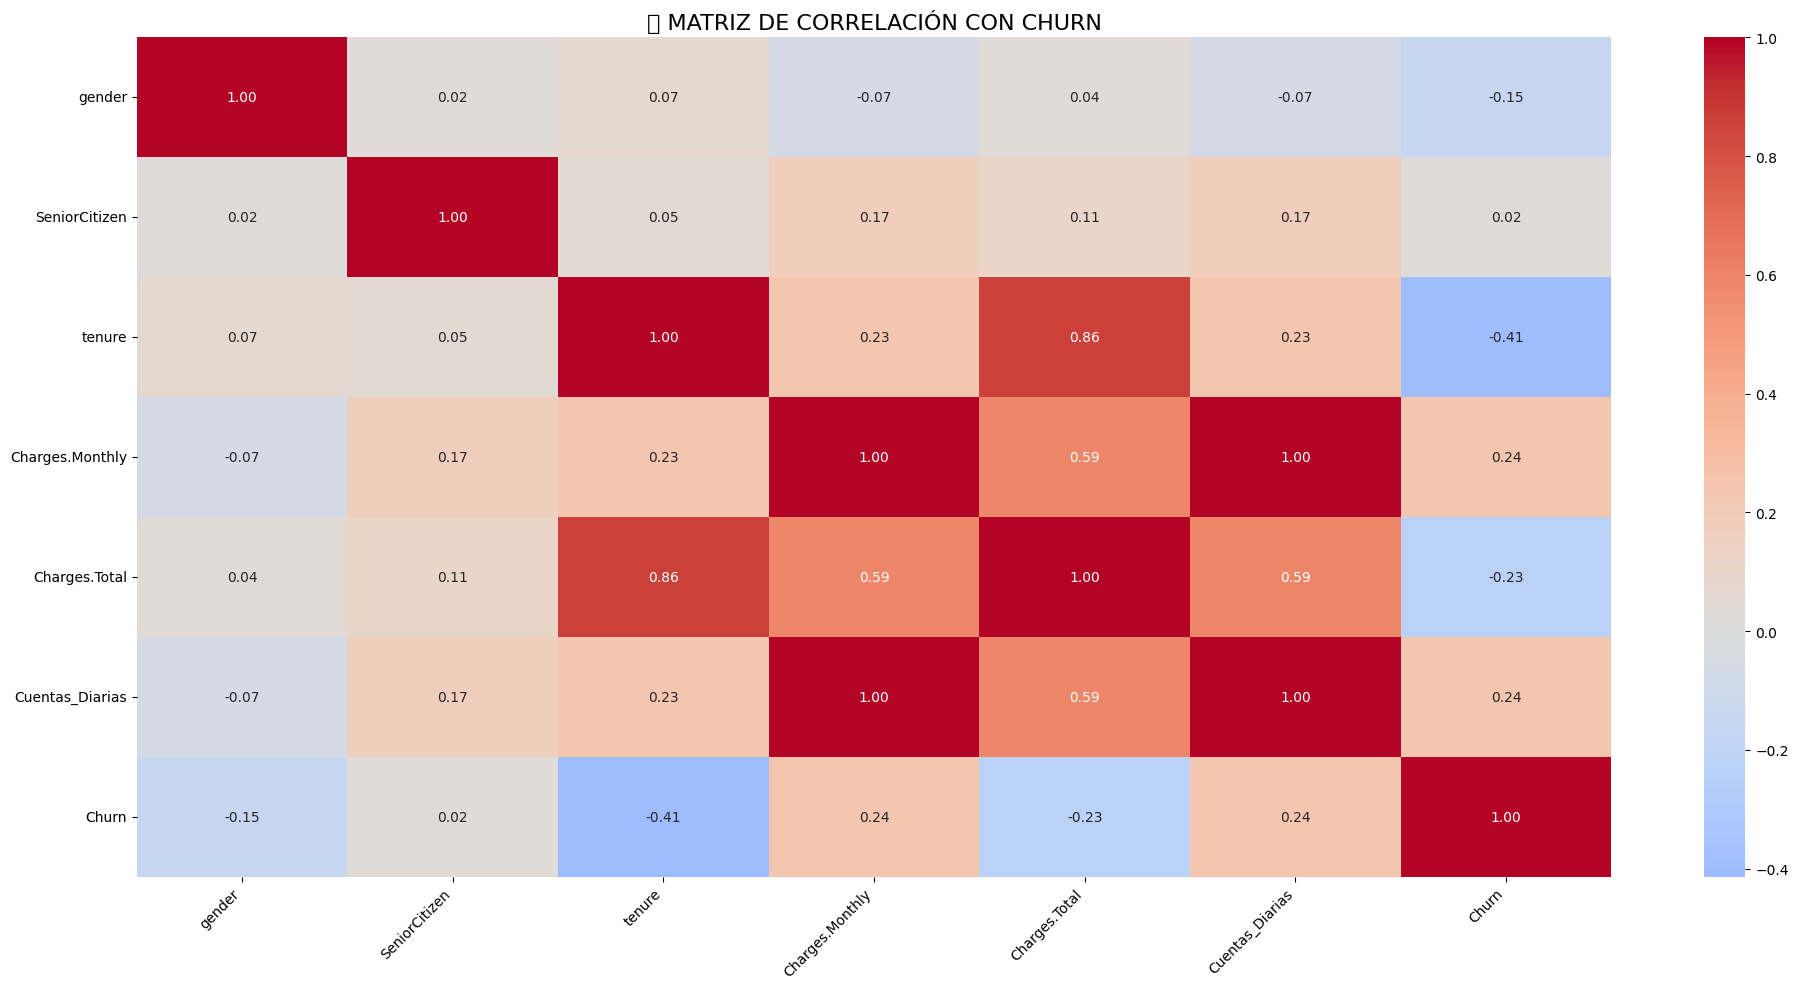

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#Unimos X con y para incluir la variable 'Churn':
df_corr = X_sampled.copy()
df_corr['Churn'] = y_sampled

#Seleccionamos solo las columnas con valor numérico
columnas_numericas = df_corr.select_dtypes(include=['int64', 'float64'])

#Calculamos la matriz de correlación:
matrix_corr = columnas_numericas.corr()

#Visualizamos la matríz de correlación con un grafico 'heatmap'
plt.figure(figsize=(20, 10))
sns.heatmap(matrix_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('🔍 MATRIZ DE CORRELACIÓN CON CHURN', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

💡**ANALISIS DIRIGIDO**


*Variables específicas, su relación con la cancelación y el grafico para visualización*



In [31]:
# Crear columna 'TotalCharges' en el DataFrame original
datos_encoded['TotalCharges'] = datos_encoded['Charges.Monthly'] * datos_encoded['tenure']

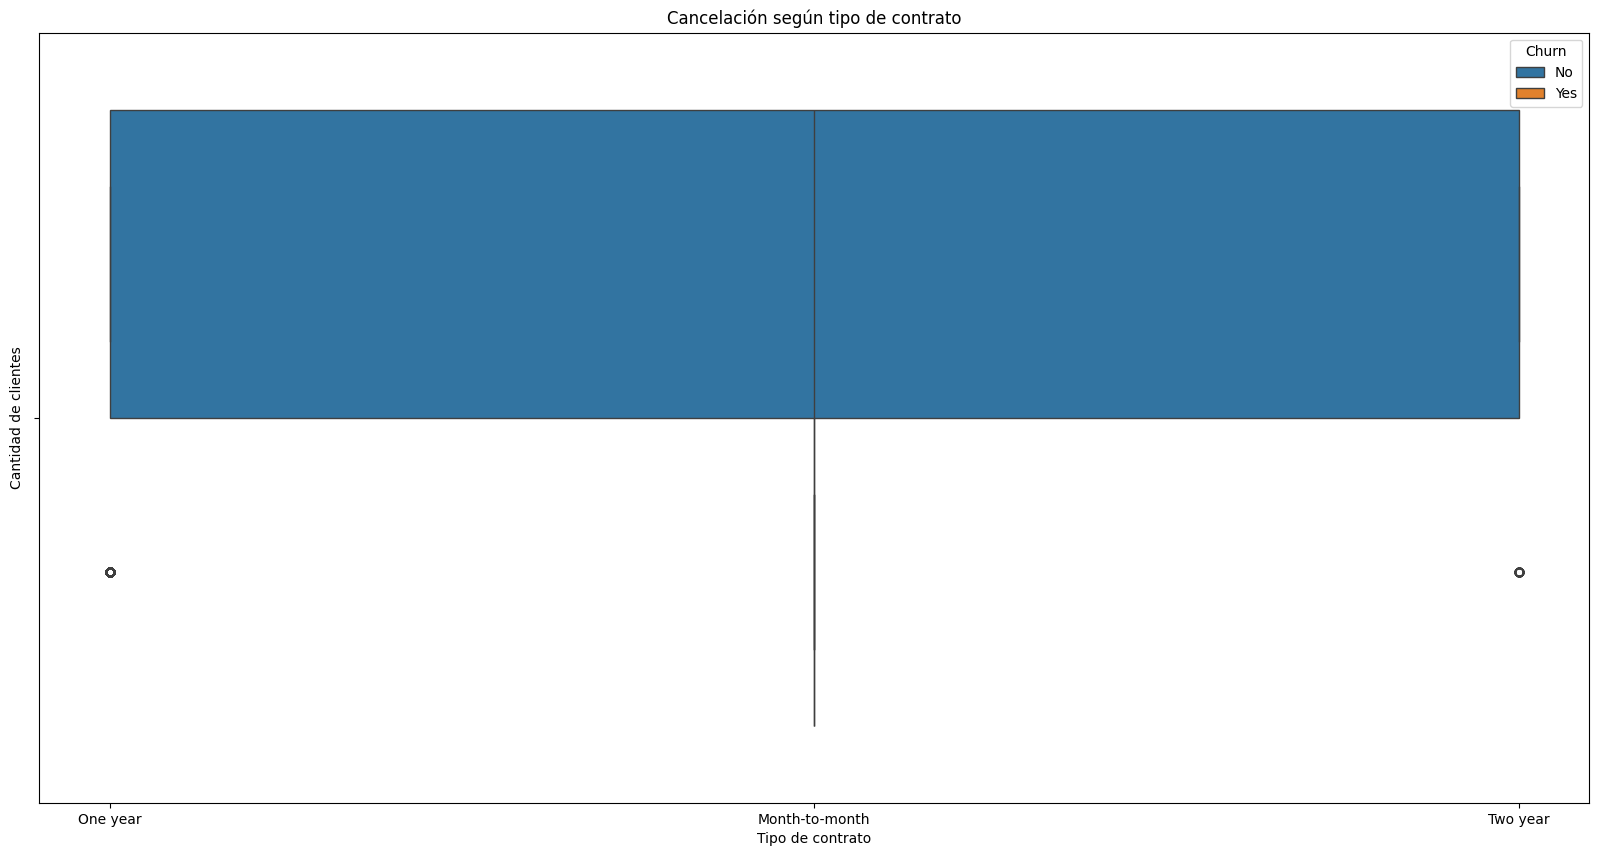

In [34]:
datos_encoded['TotalCharges'] = datos_encoded['Charges.Monthly'] * datos_encoded['tenure']

plt.figure(figsize=(20, 10))
sns.boxplot(data=datos, x='Contract', hue='Churn')
plt.title('Cancelación según tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de contrato')
plt.show()

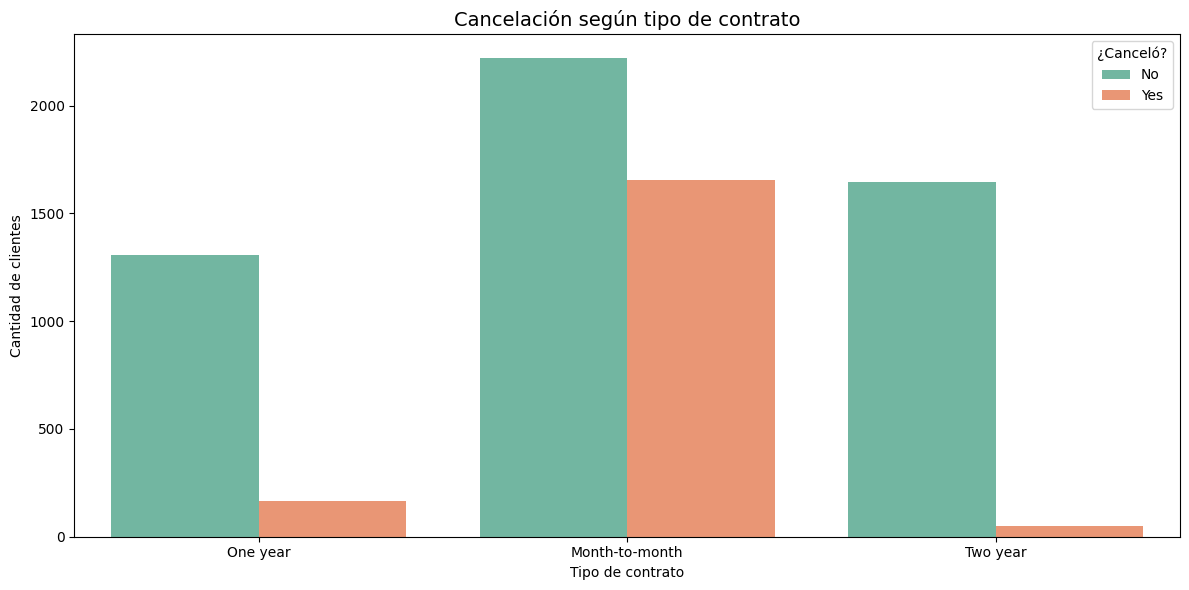

In [35]:
# Gráfico de barras: Tipo de contrato vs Cancelación
plt.figure(figsize=(12, 6))
sns.countplot(data=datos, x='Contract', hue='Churn', palette='Set2')

plt.title('Cancelación según tipo de contrato', fontsize=14)
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='¿Canceló?', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


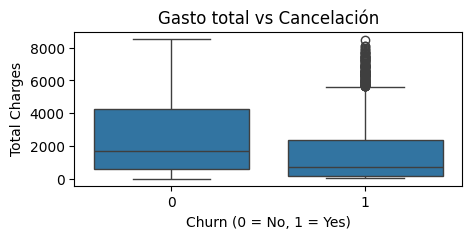

In [37]:
#Generamos un Boxplot: TotalCharges vs Cancelación
plt.figure(figsize=(5, 2))
sns.boxplot(data=datos_encoded, x='Churn', y='TotalCharges')
plt.title('Gasto total vs Cancelación')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total Charges')
plt.show()


👓**PREDICCIÓN**


*Segmentación de Datos*


Para poder medir con precisión el desempeño del modelo, es necesario dividir el conjunto de datos en dos partes: una para el entrenamiento y otra para la evaluación. Una práctica habitual consiste en asignar aproximadamente el 70% de los datos al entrenamiento y el 30% a la prueba, aunque también es común utilizar una proporción de 80/20, dependiendo del volumen total de información disponible.

*Separación de los datos*: balance de clases con stratify.






In [39]:
from sklearn.model_selection import train_test_split

# División de datos: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled,
    test_size=0.3,         # 30% para prueba
    random_state=42,       # reproducibilidad
    stratify=y_sampled     # mantiene balance de clases
)

# Mostrar tamaños de los conjuntos
print(f"📊 Tamaño del set de entrenamiento: {X_train.shape}")
print(f"📊 Tamaño del set de prueba: {X_test.shape}")

📊 Tamaño del set de entrenamiento: (7243, 31)
📊 Tamaño del set de prueba: (3105, 31)


**🔧 Construcción de Modelos Predictivos**

En esta sección se desarrollan al menos dos enfoques distintos para anticipar la cancelación de clientes. La idea es comparar el rendimiento entre modelos que requieren un ajuste previo en los datos y otros que no lo necesitan.


**🔍 Modelos para Predecir Cancelaciones**

En esta parte del proyecto se construyen dos modelos distintos para predecir si un cliente va a cancelar el servicio. La idea es comparar cómo se comportan diferentes algoritmos y entender qué tan importante es preparar los datos antes de entrenarlos.

Por ejemplo, algunos modelos como Regresión Logística o KNN funcionan mejor cuando los datos están en la misma escala, así que en esos casos conviene aplicar normalización. Esto ayuda a que las distancias o los cálculos internos no se vean afectados por variables con valores muy grandes o muy pequeños.

En cambio, otros modelos como Árboles de Decisión o Random Forest no se ven influenciados por la escala de los datos, así que se pueden usar directamente sin transformar nada.

La idea es probar ambos enfoques —con y sin normalización— para ver cuál da mejores resultados y entender cómo influye el preprocesamiento en el rendimiento del modelo.


**🤖 Modelo KNN para Predicción de Cancelación**

✅ Precisión del modelo KNN: 0.80


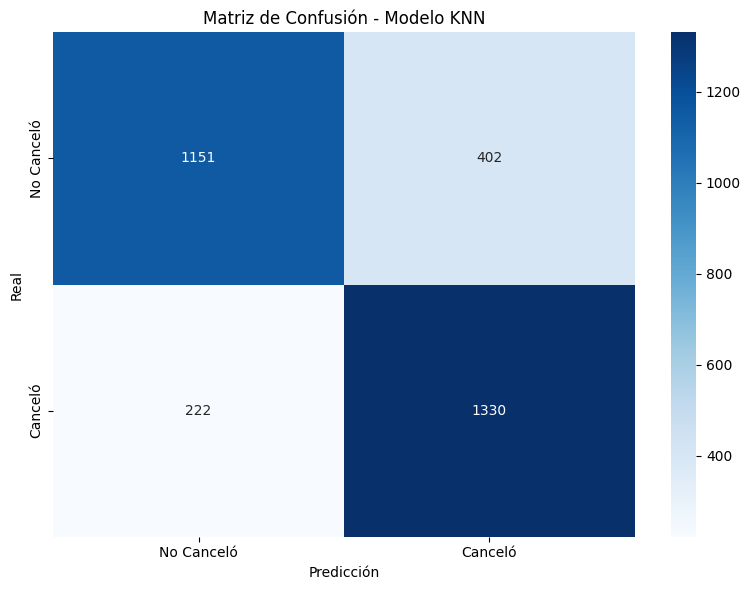


📋 Reporte de Clasificación:
              precision    recall  f1-score   support

  No Canceló       0.84      0.74      0.79      1553
     Canceló       0.77      0.86      0.81      1552

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 🔄 Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 🔍 Predicciones
y_pred = knn.predict(X_test_scaled)

# ✅ Métrica de precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.2f}")

# 📊 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Modelo KNN')
plt.tight_layout()
plt.show()

# 📋 Reporte de clasificación
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Canceló', 'Canceló']))


**🌳 Modelo Árbol de Decisión para Predicción de Cancelación**

✅ Precisión del modelo Árbol de Decisión: 0.80


/tmp/ipython-input-3571310580.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


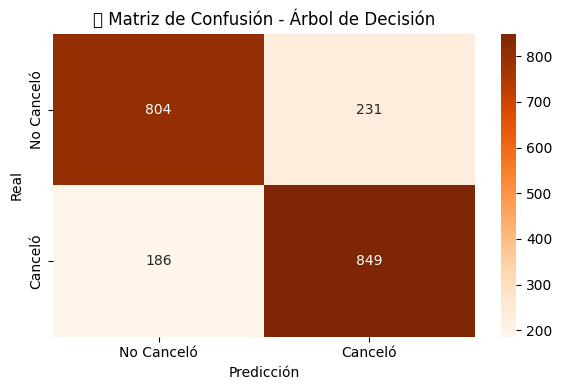


📋 Reporte de Clasificación:
              precision    recall  f1-score   support

  No Canceló       0.81      0.78      0.79      1035
     Canceló       0.79      0.82      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 🔄 División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled)

# 🧠 Entrenamiento del modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 🔍 Predicciones
y_pred = dt_model.predict(X_test)

# ✅ Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo Árbol de Decisión: {accuracy:.2f}")

# 📊 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('📊 Matriz de Confusión - Árbol de Decisión')
plt.tight_layout()
plt.show()

# 📋 Reporte de clasificación
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Canceló', 'Canceló']))

Visualizar el árbol de decisión con profundidad limitada

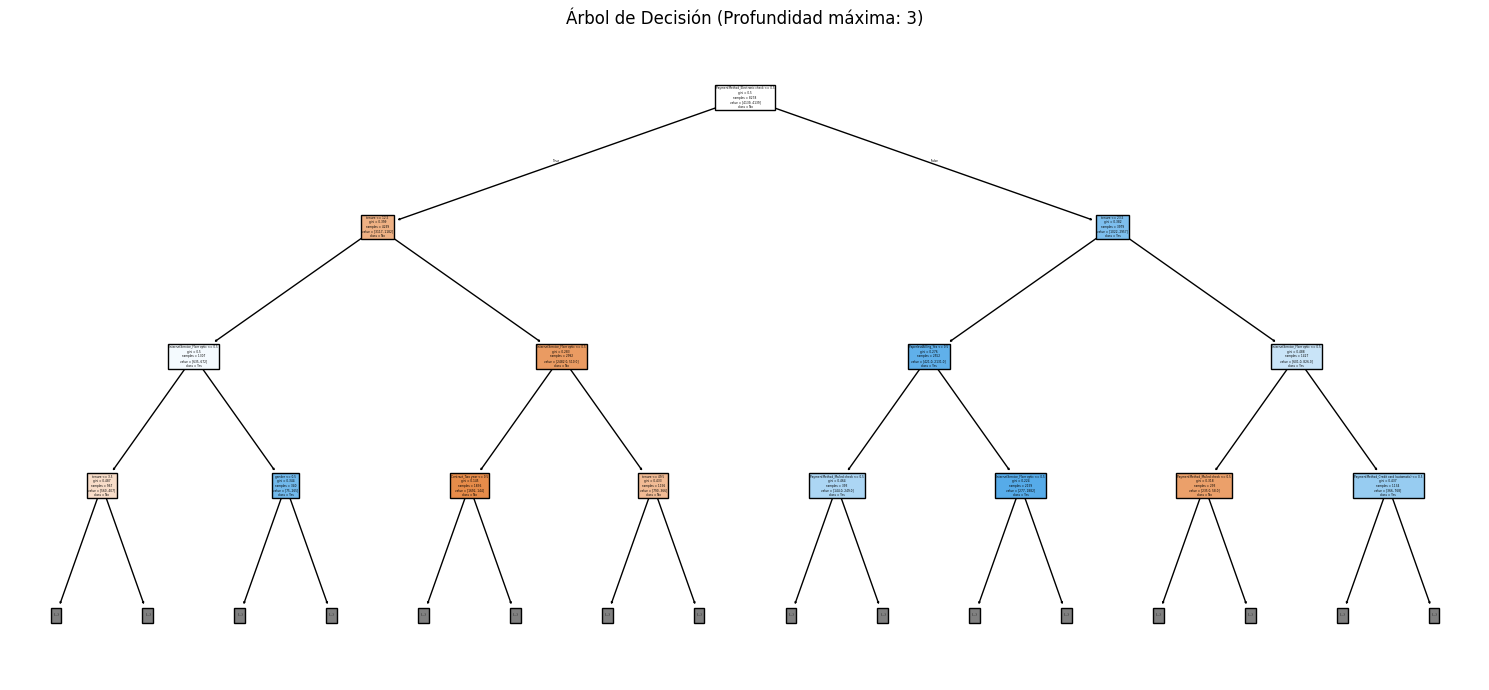

In [57]:
plt.figure(figsize=(15, 7))
plot_tree(dt_model,
          filled=True,
          feature_names=X_train.columns,
          class_names=["No", "Yes"],
          max_depth=3)
plt.title("Árbol de Decisión (Profundidad máxima: 3)")
plt.tight_layout()
plt.show()

📊 KNN vs Árbol de Decisión

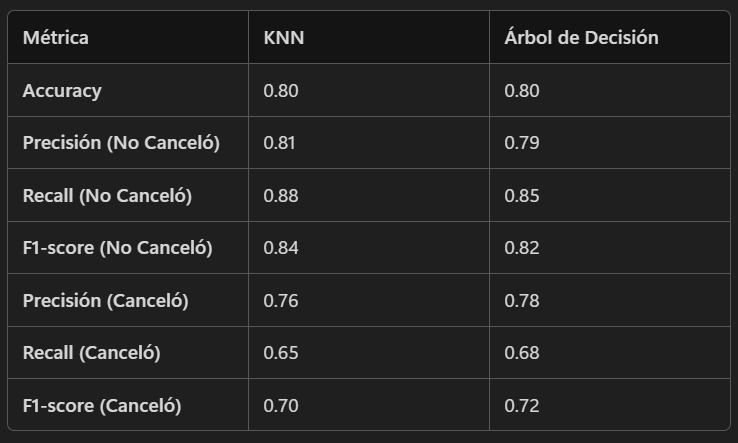

**📊 Comparación de Modelos: ¿Cuál tuvo mejor desempeño?**

Ambos modelos lograron una precisión del 80%, pero al revisar las métricas en detalle, se notan diferencias importantes en su comportamiento.

🔹 KNN se destacó por tener un recall del 86% en la clase de cancelación (Churn), lo que indica que logró identificar correctamente a la mayoría de los clientes que se dieron de baja.
Sin embargo, su precisión fue de 0.77, lo que sugiere que también clasificó erróneamente a varios clientes como cancelados cuando en realidad no lo estaban.

🔹 Árbol de Decisión, en cambio, mostró un equilibrio más sólido entre precisión y recall en ambas clases. Sus F1-scores fueron bastante parejos: 0.79 para No Churn y 0.80 para Churn, lo que refleja una clasificación más estable y confiable.

**📌 Modelo recomendado:** Árbol de Decisión, por ofrecer un mejor balance general y mayor precisión en ambas categorías.

🔍 ¿Hay señales de overfitting o underfitting?


🌳 Árbol de Decisión:

Aunque su rendimiento fue consistente, existe el riesgo de sobreajuste si no se aplicaron restricciones como poda o límites en la profundidad del árbol (max_depth, min_samples_leaf, etc.).

Esto podría provocar que el modelo funcione muy bien con los datos de entrenamiento, pero pierda capacidad de generalización con nuevos casos.
Sugerencia: aplicar poda o ajustar los parámetros para evitar que el árbol se vuelva demasiado complejo.

🤖 KNN:

El modelo mostró un buen recall en la clase positiva, pero su precisión más baja podría indicar un leve subajuste.
Esto puede deberse a que el valor de k no fue optimizado (en este caso se usó el valor por defecto: k=5).
Sugerencia: realizar una búsqueda de hiperparámetros, como GridSearchCV, para encontrar el valor de k que ofrezca el mejor rendimiento.

-

💡 Conclusiones y Recomendaciones

El modelo de Árbol de Decisión resultó ser más claro de interpretar, con un rendimiento equilibrado y sencillo de implementar, lo que lo convierte en una alternativa muy adecuada para este tipo de análisis.

Por su parte, KNN también ofrece buenos resultados, pero requiere ajustes más precisos para alcanzar su mejor desempeño.

Si se busca mejorar aún más la calidad de las predicciones, vale la pena explorar modelos más robustos como:

🌲 Random Forest: ideal para reducir el riesgo de sobreajuste.
⚡ XGBoost: destaca por su alta precisión y eficiencia.
📉 Regresión Logística: una opción simple y efectiva para problemas de clasificación.

-

🔍 Variables con mayor impacto en la predicción de cancelaciones

Las características que más influyen en la probabilidad de que un cliente cancele el servicio son:

💳 Método.Pago: Electronic check – Este método de pago está fuertemente asociado con clientes que tienden a darse de baja.

📆 Meses Contrato – Los usuarios con poco tiempo en la compañía muestran mayor propensión a cancelar.

💰 Total.facturación y Cuentas.Mensuales – Cargos elevados, tanto mensuales como acumulados, se relacionan con una mayor tasa de cancelación.

📧 Factura.Digital – La facturación electrónica también aparece como un factor relevante en los casos de baja.

🌐Internet.Servicio: Fiber optic – Este tipo de conexión, aunque más rápida, está presente con frecuencia entre los clientes que abandonan el servicio.


/tmp/ipython-input-3615677257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importancia', y='Variable', palette='magma')
/tmp/ipython-input-3615677257.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


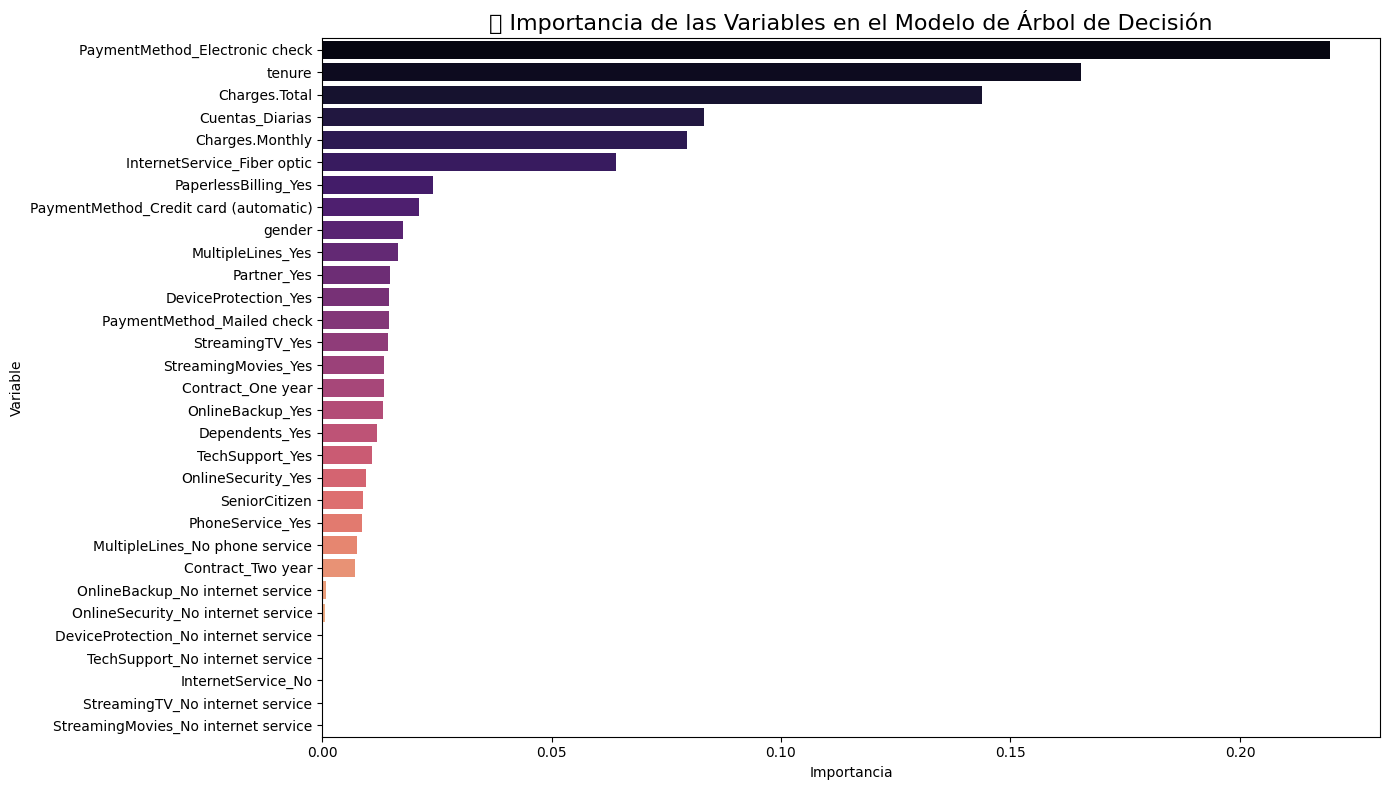

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Suponiendo que X_sampled y y_sampled ya están definidos
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled)

# Entrenamiento del modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Crear DataFrame con importancias
feature_names = X_train.columns
importances = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualización estética
plt.figure(figsize=(14, 8))
sns.barplot(data=feature_importance_df, x='Importancia', y='Variable', palette='magma')
plt.title('🔍 Importancia de las Variables en el Modelo de Árbol de Decisión', fontsize=16)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


# CONCLUSION:

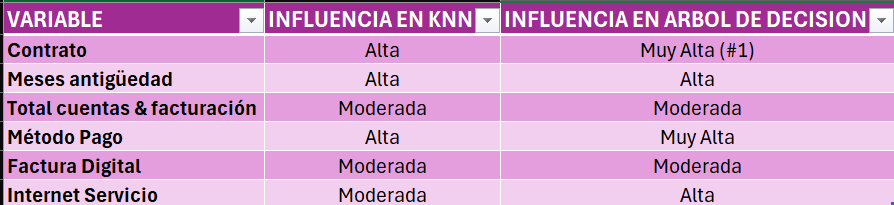

**📄 Informe FINAL de Análisis Predictivo sobre Cancelación de Clientes**

🎯 Propósito del Estudio

El objetivo principal de este análisis es identificar los factores que influyen con mayor fuerza en la decisión de los clientes de abandonar el servicio (churn), utilizando modelos de machine learning. A partir de estos hallazgos, se busca diseñar estrategias efectivas de retención que respondan directamente a las causas detectadas.

🧠 Modelos Utilizados

Para este estudio se trabajó con dos algoritmos de clasificación:

🔹 K-Nearest Neighbors (KNN)
🔹 Árbol de Decisión
📷 (Aquí se incluye una imagen comparativa entre ambos modelos: image.png)

📊 Análisis del Comportamiento de Cancelación

Al revisar la distribución de clases en el conjunto de datos, se observó que el 26.54% de los registros corresponden a clientes que cancelaron el servicio. Este porcentaje revela un desbalance considerable entre las clases Churn y No Churn.

Para corregir este desequilibrio, se aplicó la técnica SMOTE (Synthetic Minority Over-sampling Technique), que permite generar ejemplos sintéticos de la clase minoritaria. Esta solución mejora la representación de dicha clase durante el entrenamiento, lo que contribuye a un aprendizaje más sólido y reduce el sesgo hacia la clase mayoritaria.

🛡️ Estrategias Propuestas para Mejorar la Retención

🔁 Promover Contratos de Mayor Duración

Los clientes con contratos mensuales presentan una mayor tendencia a cancelar.
Acción sugerida: ofrecer incentivos como descuentos o beneficios exclusivos para quienes opten por planes anuales o bianuales.

👋 Acompañamiento en la Etapa Inicial

La variable tenure indica que los clientes nuevos son más propensos a abandonar el servicio.

Acción sugerida: implementar campañas de seguimiento en los primeros meses, incluyendo encuestas de satisfacción y atención personalizada.

💳 Optimizar Métodos de Pago

El uso de Electronic Check se asocia con una mayor tasa de cancelación.
Acción sugerida: fomentar el uso de pagos automáticos mediante tarjeta o débito directo, ofreciendo recompensas o programas de fidelización.

🛠️ Mejorar el Soporte Técnico y la Calidad del Servicio de Internet

La ausencia de TechSupport y el uso de Fiber Optic (posiblemente por problemas técnicos o costos elevados) están vinculados a cancelaciones.

Acción sugerida: monitorear la calidad del servicio, reforzar el soporte técnico y ofrecer paquetes que incluyan asistencia especializada.

📈 Monitoreo Predictivo Continuo

Se recomienda implementar el modelo de Árbol de Decisión en producción para detectar clientes con alto riesgo de cancelar y actuar de forma anticipada con intervenciones específicas.

✅ Conclusiones

El análisis realizado confirma que variables como el tipo de contrato, la antigüedad del cliente y el método de pago son elementos clave en la decisión de cancelar el servicio.

Ambos modelos utilizados —KNN y Árbol de Decisión— alcanzaron una precisión del 80%.

KNN se destacó por su capacidad para identificar clientes en riesgo, logrando un recall de 0.86 en la clase Churn, lo que lo hace útil para detectar cancelaciones de forma temprana.

Árbol de Decisión, por su parte, mostró un rendimiento más equilibrado entre ambas clases y una mayor facilidad para interpretar los resultados, lo que permite extraer reglas de negocio aplicables.

**📌 Recomendación final: **

Priorizar el uso del modelo de Árbol de Decisión en entornos reales para el monitoreo constante del riesgo de cancelación. Este modelo puede complementarse con estrategias específicas dirigidas a perfiles vulnerables, como clientes con contratos mensuales, baja antigüedad o métodos de pago asociados a mayor churn.

La implementación de estas acciones permitirá una gestión más proactiva y eficiente de la retención, ayudando a reducir significativamente la tasa de cancelación y fortaleciendo el vínculo con los clientes.
